In [1]:
import matplotlib.pyplot as plt
from module.for_dataset.create_dataset import create_dataset
from module.for_model.training import construct_and_train_model
from module.for_dataset.normalization import normalization
from module.for_model.checkpoint import save_checkpoint

# Construct dataset

In [2]:
X_train, Y_train, X_test, Y_test  = create_dataset(0,20000, "xor")

# 原本數值介於 +-2 之間而已，所以就不用 normalize 了
# 跑了一遍之後發現好像還是需要限縮到 0~1

In [3]:
for x, y , idx in zip(X_train[:5], Y_train[:5], range(len(Y_train))):
    print(f"{idx}\tx = {x},\tY = {y}")

0	x = [-0.11583055  0.00063256],	Y = 0
1	x = [-0.20344164  0.85844844],	Y = 1
2	x = [1.06442637 0.1242411 ],	Y = 1
3	x = [0.17456393 0.92070716],	Y = 1
4	x = [0.05420753 0.82052372],	Y = 1


### Preprocess

#### 觀察資料
發現 X 值
1. 有正有負
2. 明顯以 0.5 為中心，分隔開來的兩堆資料 (Y也是)

In [4]:
X_train.shape

(16000, 2)

(array([[1242., 1160., 1133., 1175., 1160., 1132., 1127.,    0.,    0.,
            0.,    0.,    0.,    0., 1127., 1069., 1117., 1138., 1123.,
         1172., 1125.],
        [1147., 1168., 1139., 1153., 1078., 1180., 1166.,    0.,    0.,
            0.,    0.,    0.,    0., 1182., 1175., 1095., 1139., 1160.,
         1097., 1121.]]),
 array([-9.99855136e-01, -8.99863795e-01, -7.99872454e-01, -6.99881113e-01,
        -5.99889771e-01, -4.99898430e-01, -3.99907089e-01, -2.99915748e-01,
        -1.99924407e-01, -9.99330655e-02,  5.82756554e-05,  1.00049617e-01,
         2.00040958e-01,  3.00032299e-01,  4.00023640e-01,  5.00014982e-01,
         6.00006323e-01,  6.99997664e-01,  7.99989005e-01,  8.99980346e-01,
         9.99971687e-01]),
 <a list of 2 BarContainer objects>)

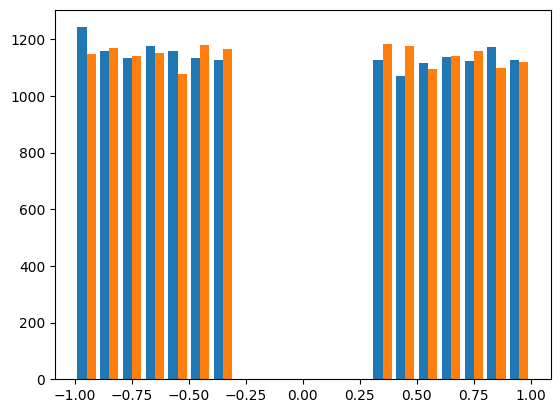

In [12]:
plt.hist(X_train - 0.5, bins=20)

(array([[252., 291., 290., 269., 282., 296., 298.,   0.,   0.,   0.,   0.,
           0.,   0., 277., 312., 299., 273., 297., 291., 273.],
        [285., 284., 278., 266., 293., 279., 258.,   0.,   0.,   0.,   0.,
           0.,   0., 287., 300., 297., 301., 285., 288., 299.]]),
 array([-4.99894733e-01, -3.99901422e-01, -2.99908111e-01, -1.99914800e-01,
        -9.99214884e-02,  7.18228413e-05,  1.00065134e-01,  2.00058445e-01,
         3.00051756e-01,  4.00045068e-01,  5.00038379e-01,  6.00031690e-01,
         7.00025001e-01,  8.00018313e-01,  9.00011624e-01,  1.00000494e+00,
         1.09999825e+00,  1.19999156e+00,  1.29998487e+00,  1.39997818e+00,
         1.49997149e+00]),
 <a list of 2 BarContainer objects>)

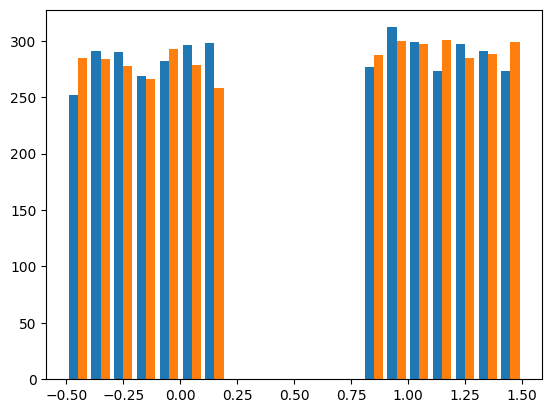

In [6]:
plt.hist(X_test, bins=20)

(array([8088.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7912.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

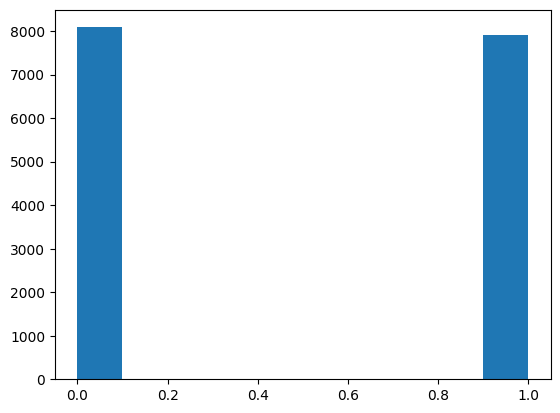

In [7]:
plt.hist(Y_train)

(array([1941.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2059.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

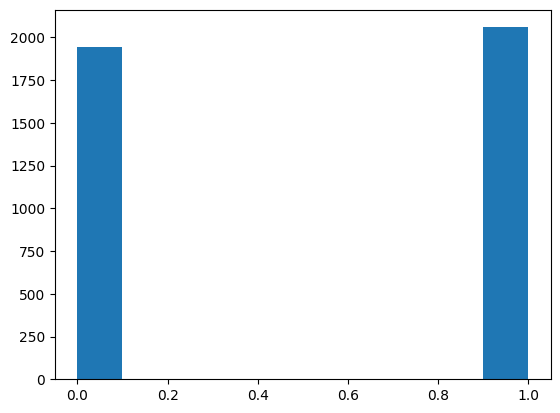

In [8]:
plt.hist(Y_test)

#### 平移+正規化

In [9]:
# reshape for the model output
# 因為計算 backprobagetion 時矩陣相乘的問題，所以需轉換
# 但 shape = (1,) 者無法透過 .T 轉置，所以必須 reshape
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))

In [10]:
normalizer = normalization(X_train-0.5)
X_train_n = normalizer.normalize(X_train-0.5)
Y_train_n = normalizer.normalize(Y_train-0.5)
X_test_n = normalizer.normalize(X_test-0.5)
Y_test_n = normalizer.normalize(Y_test-0.5)

(array([[1242., 1160., 1133., 1175., 1160., 1132., 1127.,    0.,    0.,
            0.,    0.,    0.,    0., 1127., 1069., 1117., 1138., 1123.,
         1172., 1125.],
        [1147., 1168., 1139., 1153., 1078., 1180., 1166.,    0.,    0.,
            0.,    0.,    0.,    0., 1182., 1175., 1095., 1139., 1160.,
         1097., 1121.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

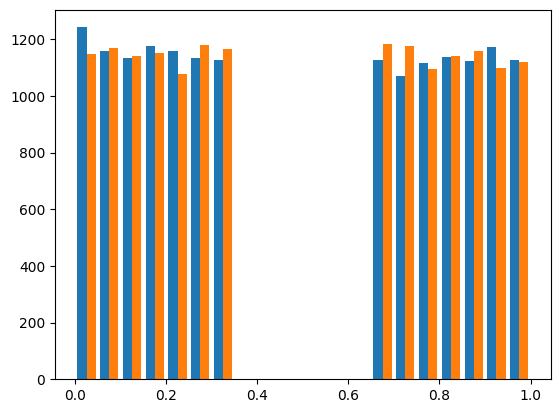

In [14]:
plt.hist(normalizer.normalize(X_train-0.5), bins=20)

In [12]:
data = [X_train_n, Y_train_n, X_test_n, Y_test_n]

In [13]:
# 為了之後畫動畫
data_2_save = [X_train_n, Y_train.flatten(), X_test_n, Y_test.flatten()]
import pickle
path_folder = "data\\xor_normalized"
path_loss = f"{path_folder}\\2024_0608_0010_part3.pkl"
with open(path_loss, 'wb') as f:
    pickle.dump(data_2_save, f)

# Train and Record

In [14]:
name_experiment = "2024_0608_0010_part3"
n = 2

folder_node = f"node_{n:02d}"
path_folder = f"checkpoints\\{name_experiment}\\{folder_node}"

loss_n = []
param_n = []
# 用 30 個不同的 randam seed 訓練 30 個不同的模型
for layer_initializer in range(5):
    print(f"\tlayer_initializer = {layer_initializer}")    

    ttl_loss, ttl_param = \
        construct_and_train_model(
            n = n,
            layer_initializer = layer_initializer,
            data = data,
            epoch_cycle = 1
        )
    loss_n.append(ttl_loss)
    param_n.append(ttl_param)

save_checkpoint(path_folder, loss_n, param_n)

	layer_initializer = 0
	layer_initializer = 1
	layer_initializer = 2
	layer_initializer = 3
	layer_initializer = 4
	layer_initializer = 5
	layer_initializer = 6
	layer_initializer = 7
	layer_initializer = 8
	layer_initializer = 9
	layer_initializer = 10
	layer_initializer = 11
	layer_initializer = 12
	layer_initializer = 13
	layer_initializer = 14
	layer_initializer = 15
	layer_initializer = 16
	layer_initializer = 17
	layer_initializer = 18
	layer_initializer = 19
	layer_initializer = 20
	layer_initializer = 21
	layer_initializer = 22
	layer_initializer = 23
	layer_initializer = 24
	layer_initializer = 25
	layer_initializer = 26
	layer_initializer = 27
	layer_initializer = 28
	layer_initializer = 29


('checkpoints\\2024_0606_0319\\node_02\\loss.pkl',
 'checkpoints\\2024_0606_0319\\node_02\\param.pkl')